학습 횟수 :  0


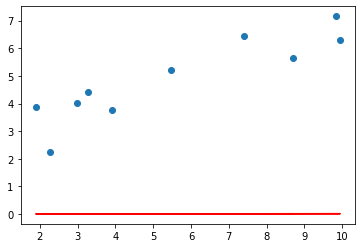

학습 횟수 :  200


<Figure size 432x288 with 0 Axes>

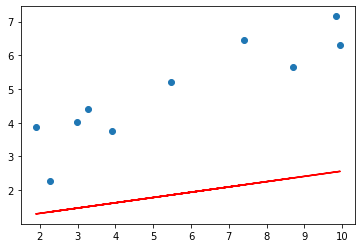

학습 횟수 :  400


<Figure size 432x288 with 0 Axes>

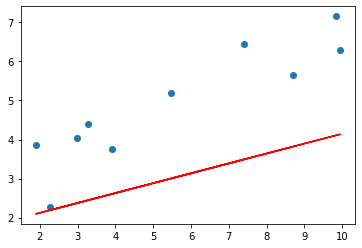

학습 횟수 :  600


<Figure size 432x288 with 0 Axes>

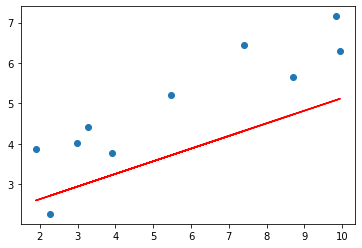

학습 횟수 :  800


<Figure size 432x288 with 0 Axes>

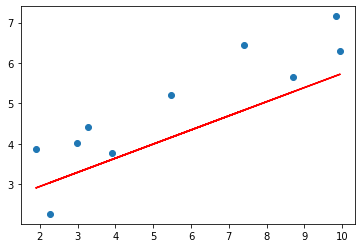

학습 횟수 :  1000


<Figure size 432x288 with 0 Axes>

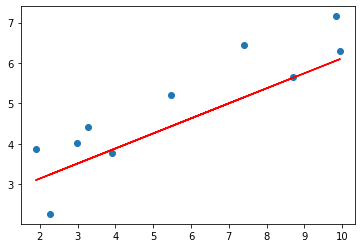

학습 횟수 :  1200


<Figure size 432x288 with 0 Axes>

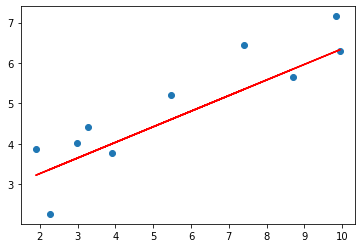

학습 횟수 :  1400


<Figure size 432x288 with 0 Axes>

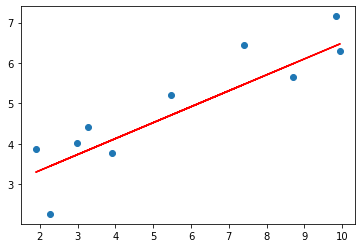

학습 횟수 :  1600


<Figure size 432x288 with 0 Axes>

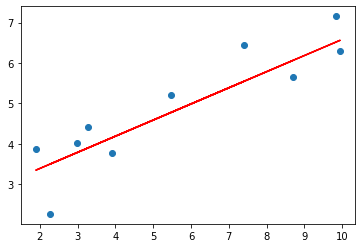

학습 횟수 :  1800


<Figure size 432x288 with 0 Axes>

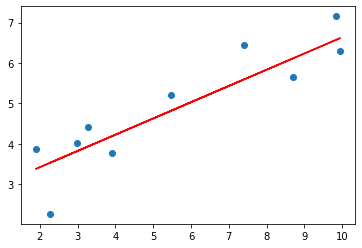

학습 횟수 :  2000


<Figure size 432x288 with 0 Axes>

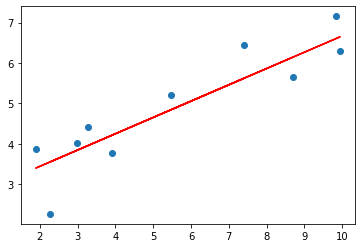

학습 횟수 :  2200


<Figure size 432x288 with 0 Axes>

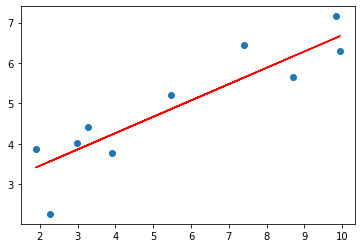

학습 횟수 :  2400


<Figure size 432x288 with 0 Axes>

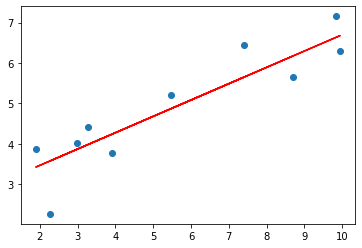

학습 횟수 :  2600


<Figure size 432x288 with 0 Axes>

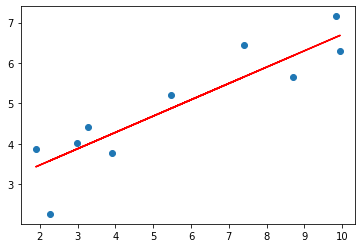

학습 횟수 :  2800


<Figure size 432x288 with 0 Axes>

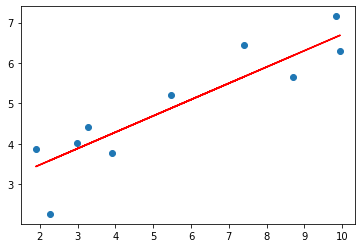

학습 횟수 :  3000


<Figure size 432x288 with 0 Axes>

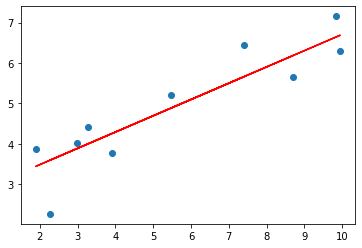

학습 횟수 :  3200


<Figure size 432x288 with 0 Axes>

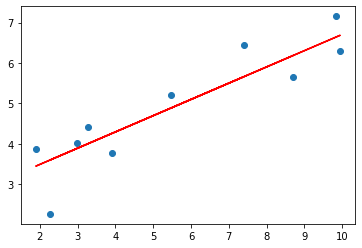

학습 횟수 :  3400


<Figure size 432x288 with 0 Axes>

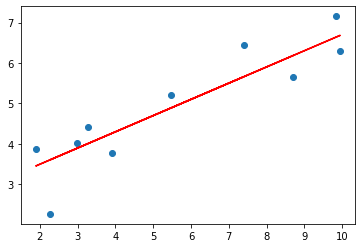

학습 횟수 :  3600


<Figure size 432x288 with 0 Axes>

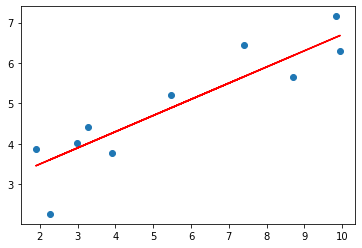

학습 횟수 :  3800


<Figure size 432x288 with 0 Axes>

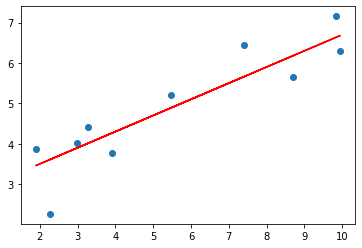

학습 횟수 :  4000


<Figure size 432x288 with 0 Axes>

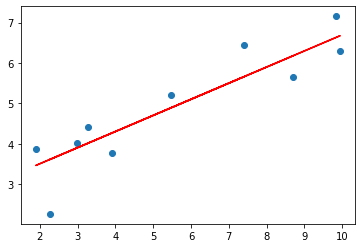

학습 횟수 :  4200


<Figure size 432x288 with 0 Axes>

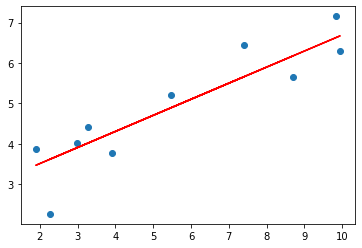

학습 횟수 :  4400


<Figure size 432x288 with 0 Axes>

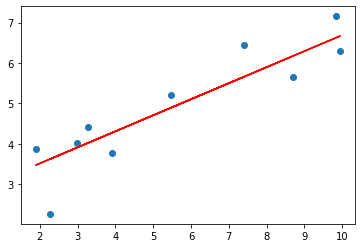

학습 횟수 :  4600


<Figure size 432x288 with 0 Axes>

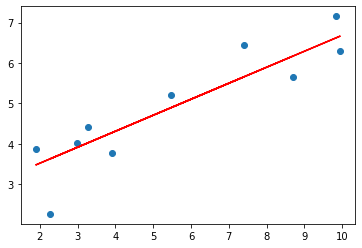

학습 횟수 :  4800


<Figure size 432x288 with 0 Axes>

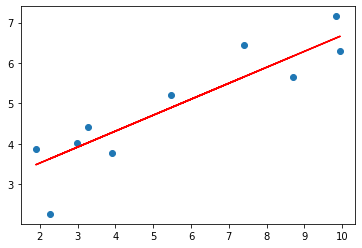

5000번의 학습 이후의 회귀 알고리즘 결과
beta_0:  [2.73807555] beta_1 [0.39410904]


<Figure size 432x288 with 0 Axes>

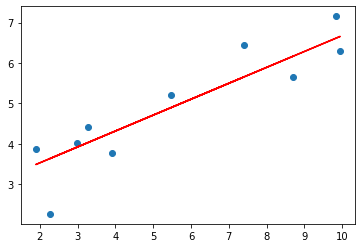

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], 
                       [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020],
            [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    return X,y


def prediction(beta_0, beta_1, X):
    pred_y = beta_0 + beta_1 * X
    return pred_y

# beta_1와 beta_0 값을 업데이트 하는 규칙을 정의하는 함수
def update_beta(beta_0, beta_1,X,loss,lr):
    
    delta_0 = -(lr*(2/len(loss)) * (np.dot(X.T, loss)))
    delta_1 = -(lr*(2/len(loss))* np.sum(loss))
    
    return delta_0, delta_1
"""
1. 반복 횟수만큼 오차(loss)를 계산하고
   beta_0, beta_1의 값을 변경하는 함수를 구현
   
   Step01. 실제 값 y와 prediction 함수를 통해 예측한
   예측값 pred_y 간의 차이(loss)를 계산 
   
   loss는 실제값(y) - 예측값(pred_y)으로 정의
   
   Step02. 구현된 함수를 이용하여
   beta_0와 beta_1의 변화값을 각각 beta0_delta, beta1_delta에 저장
"""
def gradient_descent(X, y, iters, lr):
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        loss = y - prediction(beta_0, beta_1, X)
        
        beta0_delta, beta1_delta = update_beta(beta_0, beta_1, X, loss, lr)
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        if i % 200 == 0:
            print("학습 횟수 : ", i)
            plotting_graph(X,y,beta_0, beta_1)
            
    return beta_0, beta_1
            
# 그래프를 시각화하는 함수
def plotting_graph(X,y,beta_0, beta_1):
    
    y_pred = beta_0 + beta_1[0,0]* X
    
    fig = plt.figure()
    plt.scatter(X,y)
    plt.plot(X, y_pred,c='r')
    plt.show()
    plt.savefig('test.png')
    
    
    
def main():
    #print("main")
    # 학습을 위해 필요한 파리미터 정의
    lr = 1e-4
    iteration = 5000
    
    X,y = load_data()
    
    # y = beta_0 + beta_1 * x
    beta_0, beta_1  = gradient_descent(X,y, iteration,lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0: ", beta_0[0], "beta_1",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)

if __name__ == '__main__':
    main()

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수:  0.8948735905242706


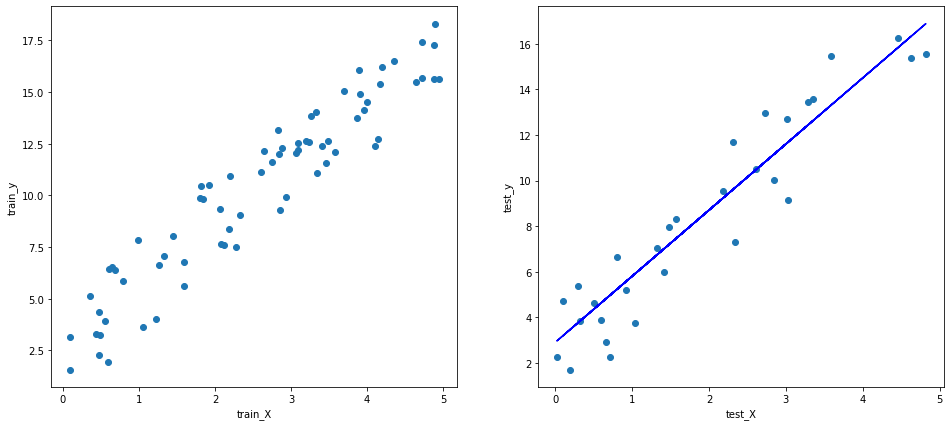

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

#사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

"""
1. 데이터를 생성하고,
   생성한 데이터를 
   학습용 데이터와 테스트용 데이터로 분리하여
   반환하는 함수 구현
   
   학습용 데이터는 전체 70%
   테스트용 데이터는 나머지 30%
"""
def load_data():
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=0)
    #print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)
    
    return train_X, test_X, train_y, test_y
 
"""
2. 단순 선형회귀 모델을 불러오고,
   불러온 모델을 학습요 데이터에
   맞추어 학습시킨 후
   테스트 데이터에 대한 
   예측값을 반환하는 함수 구현 
   
   Step01. 사이킷런에 구현되어 있는
           단순 선형회귀 모델을 불러옵니다.
    
   Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킵니다.
"""
def regression_model(train_X, train_y):
    simplelinear = LinearRegression()
    simplelinear.fit(train_X, train_y)
    return simplelinear
    
    
"""
3. 모델 학습 및 예측 결과 확인을 위한
   main() 함수를 구현 
   
   Step01. 학습이 완료된 모델을 활용하여
           테스트 데이터에 대한 예측을 수행 
    
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 모델 학습 평가
           점수를 model_score 변수에 저장 
           
   Step03. 학습된 모델의 beta_0와 beta_1를
           각각 변수 beta_0와 beta_1에 저장

"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    simplelinear = regression_model(train_X, train_y)
    predicted = simplelinear.predict(test_X)
    model_score = simplelinear.score(test_X, test_y)
    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print("> beta_0 : ", beta_0)
    print("> beta_1 : ", beta_1)
    
    print("> 모델 평가 점수: ", model_score)
    
    # 시각화 함수 호출
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    

def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16,7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X, test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    

if __name__ == '__main__':
    main()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# boston 데이터를 위한 모듈
from sklearn.datasets import load_boston

"""
1. 사이킷런에 존재하는 데이터를 불러오고,
   불러온 데이터를 학습용 데이터와 테스트용 데이터로
   분리하여 반환하는 함수 구현 
"""

def load_data():
    
    X,y = load_boston(return_X_y=True)
    
    print("데이터의 입력값(X)의 개수: ",X.shape)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.2, random_state =100)
    print(train_X.shape,test_X.shape)
    return train_X, test_X, train_y, test_y

"""
2. 다중 선형회귀 모델을 불러오고,
   불러온 모델을  학습용 데이터에 맞추어 학습시킨 후
   해당 모델을 반환하는 함수 구현
   
   Step01. 사이킷런에 구현되어 있는 
           다중 선형회귀 모델을 불러온다.
    
   Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킨다.
"""

def Multi_Regression(train_X, train_y):
    
    multilinear = LinearRegression()
    multilinear.fit(train_X, train_y)
    return multilinear
    

"""
3. 모델 학습 및 예측 결과 확인을 위한
   main() 함수를 구현 
   
   Step01. 학습이 완료된 모델을 활용하여
           테스트 데이터에 대한 예측을 수행 
    
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 모델 학습 평가
           점수를 model_score 변수에 저장 
           
   Step03. 학습된 모델의 beta_0와 beta_1를
           각각 변수 beta_0와 beta_1에 저장
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    multilinear = Multi_Regression(train_X, train_y)
    
    predicted = multilinear.predict(test_X)
    
    model_score = multilinear.score(test_X, test_y)
    
    print("\n>모델 평가 점수: ", model_score)
    
    beta_0 = multilinear.intercept_
    beta_i_list = multilinear.coef_
    
    print("\n> beta_0 : ", beta_0)
    print("> beta_i_list: ", beta_i_list)
    

if __name__ == '__main__':
    main()

데이터의 입력값(X)의 개수:  (506, 13)
(404, 13) (102, 13)

>모델 평가 점수:  0.7555033086871306

> beta_0 :  36.33377028550793
> beta_i_list:  [-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


(50, 1) (50, 1)


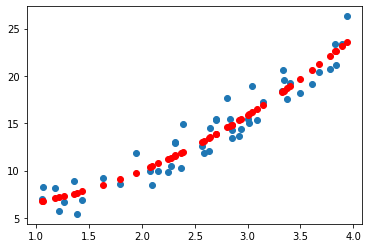

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈 
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    np.random.seed(0)
    X = 3*np.random.rand(50,1) + 1
    y = X**2 + X + 2 + 5*np.random.rand(50,1)
    print(X.shape, y.shape)
    return X,y

def Polynomial_transform(X):
    poly_feat = PolynomialFeatures(degree=2,include_bias=True)
    #print("X: ",X[:3])
    poly_X = poly_feat.fit_transform(X)
    #print("변환 이후 X 데이터\n", poly_X[:3])
    return poly_X

def Multi_Regression(poly_x, y):
    multilinear = LinearRegression()
    multilinear.fit(poly_x, y)
    
    return multilinear

def plotting_graph(x,y, predicted):
    fig = plt.figure()
    plt.scatter(x,y)
    plt.scatter(x, predicted, c='r')
    

def main():
    X,y = load_data()
    poly_x = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_x, y)
    predicted = linear_model.predict(poly_x)
    
    plotting_graph(X,y, predicted)


if __name__ == '__main__':
    main()

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# sklearn KFold 모듈
from sklearn.model_selection import KFold

def load_data():
    X,y = load_boston(return_X_y = True)
    print(X.shape, y.shape)

    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state = 100)
    return train_X, test_X, train_y, test_y


"""
2. K-fold 교차 검증을 통한
   모델 학습 및 예측 수행을 진행할 함수 
   
   Step01. 전체 데이터를 5개로 분리할 수 있도록 KFold 객체을 정의한다.
   
   Step02. 정의한 kFold 객체와  .split() 함수를 이용하여
           학습용 데이터 내애서 다시 
           학습용(Train) 데이터와 검증용(Validataion) 데이터를 나눅어
           각각 X_train, X_val, y_train, y_val에 저장 
           
           train_idx와 val_idx는 분리된 데이터들의 인덱스 이다.
           
   Step03. 분리한 학습용 데이터로 모델을 학습시키고,
           검증용 데이터로 모델을 평가하여
           각 데이터에 대한 모델 평가 점수를 socre 변수에 저장한다.
"""
def kfold_regression(train_X, train_y):
    model = LinearRegression()
    # 반복문 내에서 횟수를 표시하기 위한 변수
    n_iter = 0
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성
    model_scores= []
    kfold = KFold(n_splits=5)
    
    for train_idx, val_idx in kfold.split(train_X):
        X_train, X_val = train_X[train_idx], train_X[val_idx]
        y_train, y_val = train_y[train_idx], train_y[val_idx]
        model.fit(X_train, y_train)
        
        # 각 Iter 별 모델 평가 점수 측정
        score = model.score(X_val, y_val)
        
        # 학습용 데이터의 크기를 저장
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
        
        print("Iter : {0} Cross-Validation Accuracy: {1}, Train Data 크기 : {2}, \
               Validation Data 크기: {3}".format(n_iter,score, train_size, val_size))
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
    return kfold, model, model_scores
def main():
    
    #학습용 데이터와 테스트 데이터 불러오기
    train_X, test_X,train_y,test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print("\n> 평균 검증 모델 점수: ", np.mean(model_scores))
    
    #테스트 데이터에 대한 모델 성능 점수 출력:
    print("> 테스트 데이터 모델 점수: ", model.score(test_X, test_y))
    
    

if __name__ =='__main__':
    main()

(506, 13) (506,)
Iter : 0 Cross-Validation Accuracy: 0.6225277546797329, Train Data 크기 : 323,                Validation Data 크기: 81
Iter : 1 Cross-Validation Accuracy: 0.7158099616179285, Train Data 크기 : 323,                Validation Data 크기: 81
Iter : 2 Cross-Validation Accuracy: 0.7986314390280342, Train Data 크기 : 323,                Validation Data 크기: 81
Iter : 3 Cross-Validation Accuracy: 0.6952286567450783, Train Data 크기 : 323,                Validation Data 크기: 81
Iter : 4 Cross-Validation Accuracy: 0.700695753685302, Train Data 크기 : 324,                Validation Data 크기: 80

> 평균 검증 모델 점수:  0.7065787131512152
> 테스트 데이터 모델 점수:  0.7572608014205964


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Ridge 회귀의 beta_i
 NOX       -2.371619
DIS       -1.248808
PTRATIO   -0.797945
LSTAT     -0.559366
CRIM      -0.101435
INDUS     -0.042962
TAX       -0.013993
AGE       -0.010707
B          0.010037
ZN         0.049579
RAD        0.279596
CHAS       1.952021
RM         3.702272
dtype: float64
Lasso 회귀의 beta_i
 LSTAT     -0.564038
TAX       -0.009282
CRIM      -0.000000
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS       -0.000000
RAD        0.000000
PTRATIO   -0.000000
B          0.007496
ZN         0.026146
dtype: float64


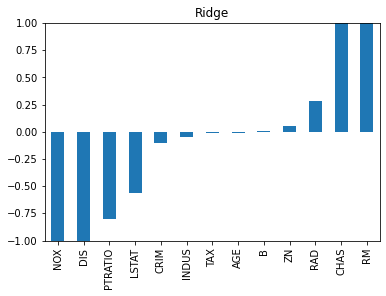

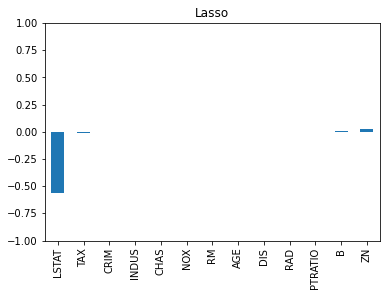

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

def load_data():
    X,y = load_boston(return_X_y = True)
    feature_names = load_boston().feature_names
    print(feature_names)
    return X,y, feature_names

def Ridge_regression(X,y):
    ridge_reg = Ridge(alpha=10)
    ridge_reg.fit(X,y)
    return ridge_reg

def Lasso_regression(X,y):
    lasso_reg = Lasso(alpha = 10)
    
    lasso_reg.fit(X,y)
    
    return lasso_reg

def main():
    X,y, feature_names = load_data()
    
    ridge_reg = Ridge_regression(X,y)
    lasso_reg = Lasso_regression(X,y)
    
    ## Ridge 회귀의 beta_i의 크기를 저장
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridge 회귀의 beta_i\n", ridge_coef)
    
    ## Lasso 회귀의 beta_i의 크기를 저장
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)
    
    plot_graph(ridge_coef,'Ridge')
    plot_graph(lasso_coef, "Lasso")
    
def plot_graph(coef, title):
    fig = plt.figure()
    
    plt.ylim(-1,1)
    plt.title(title)
    coef.plot(kind='bar')
    
if __name__ == '__main__':
    main()

ElasticNet 회귀의 평가 점수:  0.7529261038422002

ElasticNet 회귀의 beta_i
 NOX       -12.156353
DIS        -1.458449
PTRATIO    -0.881076
LSTAT      -0.490034
CRIM       -0.079070
INDUS      -0.021011
TAX        -0.012515
AGE        -0.012100
B           0.009741
ZN          0.048669
RAD         0.277583
CHAS        2.985592
RM          3.697319
dtype: float64


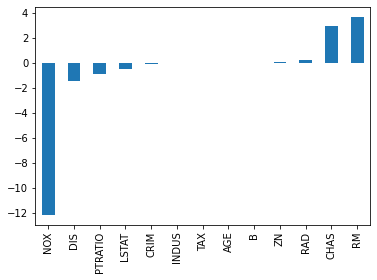

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

def load_data():
    
    X,y = load_boston(return_X_y = True)
    feature_names = load_boston().feature_names
    return X,y,feature_names

def ElasticNet_regression(train_X, train_y):
    #ElasticNet_reg = ElasticNet()
    #ElasticNet_reg = ElasticNet(alpha=0.1)
    ElasticNet_reg = ElasticNet(alpha=0.001, l1_ratio = 0.001)
    
    ElasticNet_reg.fit(train_X, train_y)
    return ElasticNet_reg
    
def plot_graph(coef):
    coef.plot(kind='bar')
    
def main():
    X,y, feature_names = load_data()
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    score = elasticnet_reg.score(test_X, test_y)
    print("ElasticNet 회귀의 평가 점수: ", score)
    
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("\nElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)

if __name__ == '__main__':
    main()

> RSS :  [62.6719913]


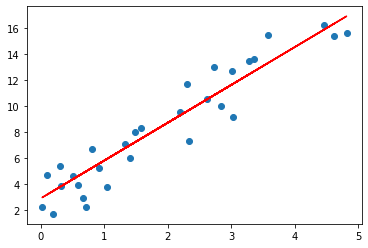

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def load_data():
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

def Linear_Regression(train_X, train_y):
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    return lr

def return_RSS(test_y, predicted):
    RSS = 0
    for i in range(len(test_y)):
        RSS += (test_y[i] - predicted[i]) ** 2
    
    return RSS

def main():
    train_X,test_X, train_y, test_y = load_data()
    
    lr = Linear_Regression(train_X, train_y)
    
    predicted = lr.predict(test_X)
    RSS = return_RSS(test_y, predicted)
    print("> RSS : ", RSS)
    
    plotting_graph(test_X, test_y, predicted)

def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X, test_y)
    plt.plot(test_X, predicted, color='r')
    
if __name__ == '__main__':
    main()